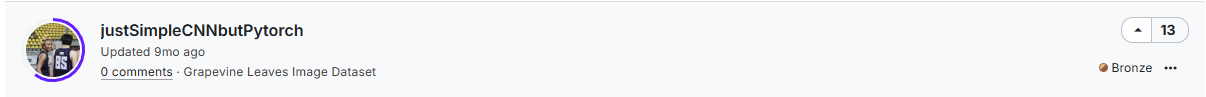

In [1]:
import os
import random
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from PIL import Image

In [2]:
# Paths to the directories
base_path = 'D:\code_study\ML_CODE\dataSets\Grapevine_Leaves_Image_Dataset\Grapevine_Leaves_Image_Dataset'

# Define transformations for data augmentation
transform = transforms.Compose([
    transforms.Resize((100, 100)),  # Resize images to 100x100
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(20),  # Randomly rotate images by 20 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])

In [3]:
# Load the dataset using ImageFolder and apply transformations
dataset = ImageFolder(root=base_path, transform=transform)

# Split the dataset into train, validation, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create data loaders for each set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
# Function to show a batch of images
def show_images(loader, title):
    # Get a batch of images
    images, _ = next(iter(loader))
    
    # Make a grid from batch
    grid = torchvision.utils.make_grid(images, nrow=8, padding=2)
    
    # Convert to numpy and transpose from (C, H, W) to (H, W, C) format
    grid = np.transpose(grid.numpy(), (1, 2, 0))
    
    # Plot the grid
    plt.figure(figsize=(15, 15))
    plt.imshow(grid)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show a batch of training images
show_images(train_dataset, 'Training Images')

# Show a batch of validation images
show_images(val_loader, 'Validation Images')

# Show a batch of test images
show_images(test_loader, 'Test Images')

: 

: 